<a href="https://colab.research.google.com/github/am-1t/Data_Analysis_with_Python/blob/main/model_building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


***Linear Regression:***
For this example we will look at how highway-mpg will help us predict the car price. Using simple linear regression we will create a linear function with 'highway-mpg' as the predictor variable and the 'price' as the response variable. We should get a final linear model with the structure 'Y=mX+c', where m = slope of the regression line and c = intercept.

Price = ***-821.73*** * highway-mpg + ***38423.30***

In [3]:
lm = LinearRegression()
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X, Y)
Yhat = lm.predict(X)
print(f"Intercept: {lm.intercept_} and Slope: {lm.coef_}")

Intercept: 38423.3058581574 and Slope: [-821.73337832]


Plotting the predicted price and actual price will provide a better comparison.

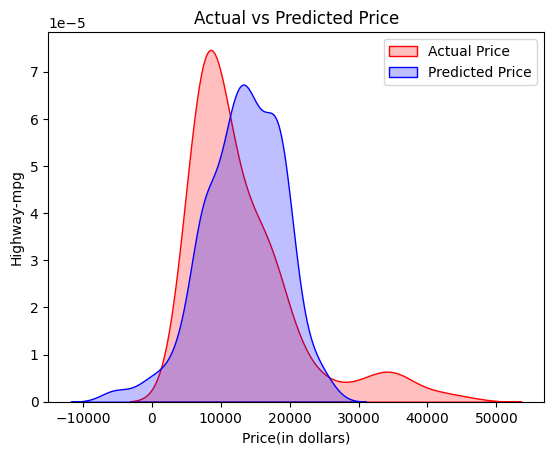

In [4]:
ax1 = sns.kdeplot(df['price'], fill=True, color='r', label='Actual Price')
sns.kdeplot(Yhat, fill=True, color='b', label='Predicted Price', ax=ax1)
plt.title('Actual vs Predicted Price')
plt.legend()
plt.xlabel('Price(in dollars)')
plt.ylabel('Highway-mpg')
plt.show()

***Accuracy of the model:***Two very important measures that are often used in Statistics to determine the accuracy of a model are:
*   R^2/R-squared
*   Mean Squared Error(MSE)

In [5]:
r_squared = lm.score(X, Y)
mse = mean_squared_error(Y, Yhat)

print(f"R-squared: {r_squared}")
print(f"MSE: {mse}")

R-squared: 0.4965911884339176
MSE: 31635042.944639888


***Multiple Linear Regression:*** What if we want to predict the car price using more than one variable. If we want to use more than one variable in our model to predict the car price, we can use Multiple Linear Regression.

Good predictors of price could be:
*   Horsepower
*   Curb-weight
*   Engine-size
*   Highway-mpg

In [6]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm1 = LinearRegression()
lm1.fit(Z, Y)
yhat_mlr = lm1.predict(Z)

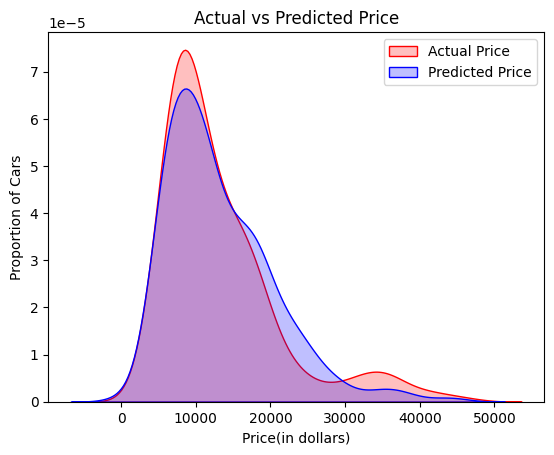

In [7]:
ax2 = sns.kdeplot(df['price'], fill=True, color='r', label='Actual Price')
sns.kdeplot(yhat_mlr, fill=True, color='b', label='Predicted Price', ax=ax2)
plt.title('Actual vs Predicted Price')
plt.legend()
plt.xlabel('Price(in dollars)')
plt.ylabel('Proportion of Cars')
plt.show()

Correlation of different variables with the price. Correlation ranges from -1 to 1.

In [8]:
print("Correlation of variables with price:\n")
print(Z.corrwith(df['price']))

Correlation of variables with price:

horsepower     0.809575
curb-weight    0.834415
engine-size    0.872335
highway-mpg   -0.704692
dtype: float64


In [9]:
r_squared = lm1.score(Z, Y)
mse = mean_squared_error(Y, yhat_mlr)

print(f"R-squared: {r_squared}")
print(f"MSE: {mse}")

R-squared: 0.8093562806577457
MSE: 11980366.87072649


***Polynomial Regression:*** It is a particular case of the general linear regression model or multiple linear regression models. We saw that a linear model did not provide the best fit. We shall try if the polynomial model can do better. We can perform a polynomial transform on multiple features.

***Pipeline:*** Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [14]:
pipe = Pipeline([('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=3, include_bias=False)), ('model', LinearRegression())])
print(pipe)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('model', LinearRegression())])


In [15]:
pipe.fit(Z, Y)
ypipe = pipe.predict(Z)

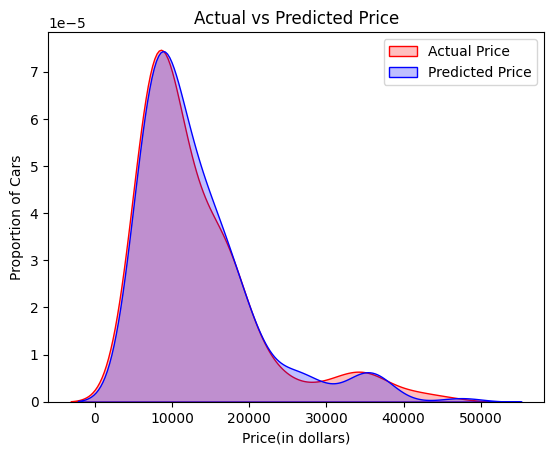

In [16]:
ax2 = sns.kdeplot(df['price'], fill=True, color='r', label='Actual Price')
sns.kdeplot(ypipe, fill=True, color='b', label='Predicted Price', ax=ax2)
plt.title('Actual vs Predicted Price')
plt.legend()
plt.xlabel('Price(in dollars)')
plt.ylabel('Proportion of Cars')
plt.show()

We can see that polynomial regression does fit better but there's always the risk of overfitting in polynomial models.

In [26]:
x = df['horsepower']
y = df['price']
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
mse_plr = mean_squared_error(y, p(x))

print(f"R-squared: {r_squared}")
print(f"MSE: {mse_plr}")

R-squared: 0.6627880537087625
MSE: 21190956.847144


***Prediction and Decision Making:*** We trained the model using the fit. Now we will use the method predict to produce a prediction.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


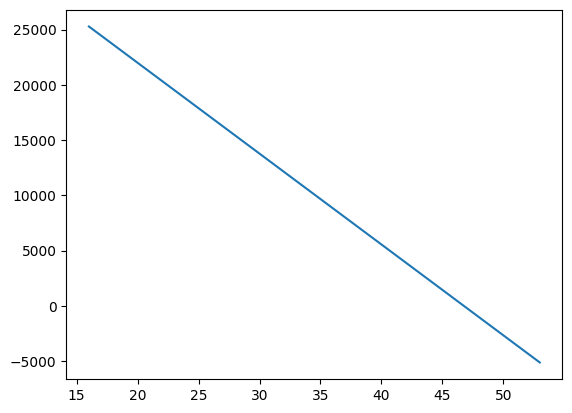

array([25275.57180501, 24453.83842668, 23632.10504836, 22810.37167004,
       21988.63829172])

In [40]:
new_input = np.arange(16, 54, 1).reshape(-1, 1)
lm.fit(X, Y)
yhat = lm.predict(new_input)
plt.plot(new_input, yhat)
plt.show()
yhat[0:5]

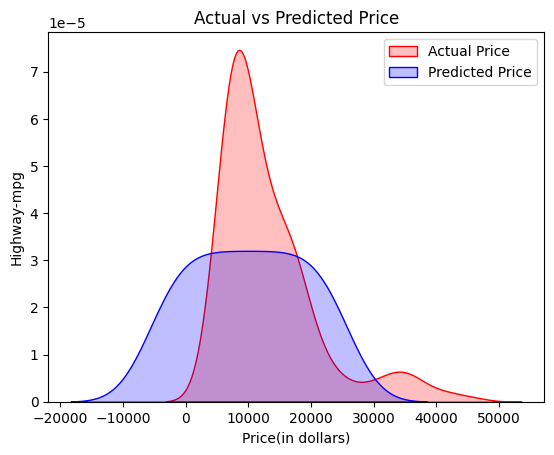

In [41]:
axx = sns.kdeplot(df['price'], fill=True, color='r', label='Actual Price')
sns.kdeplot(yhat, fill=True, color='b', label='Predicted Price', ax=axx)
plt.title('Actual vs Predicted Price')
plt.legend()
plt.xlabel('Price(in dollars)')
plt.ylabel('Highway-mpg')
plt.show()